In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from openbb_terminal.sdk import openbb
import quantstats as qs

import seaborn as sns

## Get daily data for SPY for 2 years

In [44]:
data = openbb.stocks.load("SPY", start_date="2021-06-01", end_date="2023-06-30")

Loading Daily data for SPY with starting period 2021-06-01.

## For each day, calculate the 4-day cumulative volume, and the 4-day lookahead log return

In [45]:
data['four_day_vol'] = data['Volume'].rolling(4).sum()
data['four_day_forward_return'] = - data["Adj Close"].apply(np.log).diff(-4)

## To avoid overlapping observations, select every 4th day

In [46]:
result_set = data.iloc[::4, :].dropna()

In [47]:
result_set

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,four_day_vol,four_day_forward_return
date,,,,,,,,,,
2021-06-07,407.197894,407.380976,405.848893,406.812469,406.812469,51555000,0.0,0.0,214729700.0,0.005009
2021-06-11,408.749276,408.970880,407.419535,408.855255,408.855255,45570800,0.0,0.0,192161500.0,-0.005530
2021-06-17,406.311433,407.612238,404.047022,406.600494,406.600494,90949700,0.0,0.0,265202800.0,0.004758
2021-06-23,409.110101,409.941473,408.452732,408.539734,408.539734,49445400,0.0,0.0,298644000.0,0.011996
2021-06-29,413.644066,414.301435,412.919020,413.470062,413.470062,35970500,0.0,0.0,192369900.0,0.012154
...,...,...,...,...,...,...,...,...,...,...
2023-06-01,415.078594,419.873821,413.787969,418.781738,418.781738,88865000,0.0,0.0,365722800.0,0.011151
2023-06-07,425.354032,426.525525,423.040797,423.477631,423.477631,85373300,0.0,0.0,306222400.0,0.023425
2023-06-13,432.184487,434.179989,431.499454,433.514832,433.514832,95899700,0.0,0.0,319699600.0,0.004898


## Run a regression of the 4-day forward return vs. the 4-day lookback volume

In [48]:
corr_set = result_set[['four_day_vol', 'four_day_forward_return']]

In [49]:
corr_set.corr()

,four_day_vol,four_day_forward_return
four_day_vol,1.000000,0.038596
four_day_forward_return,0.038596,1.000000


<Axes: xlabel='four_day_vol', ylabel='four_day_forward_return'>

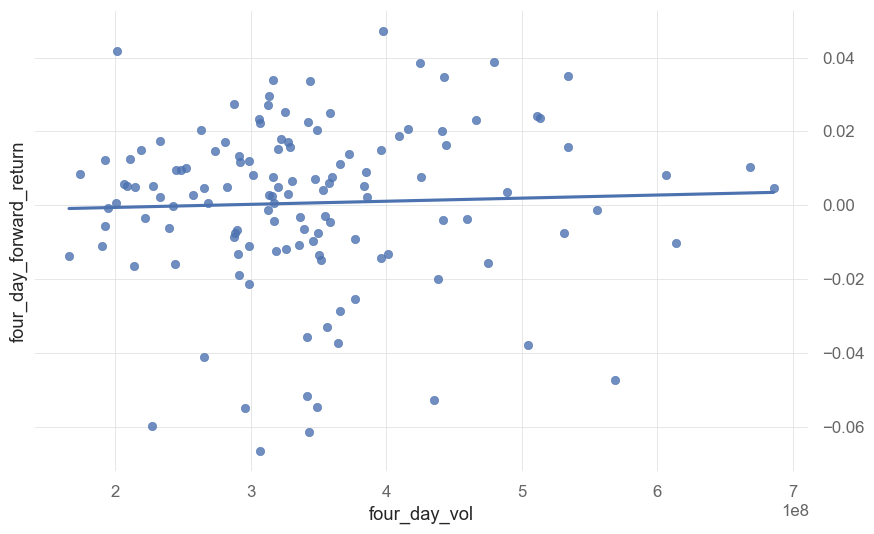

In [51]:
sns.regplot(x = 'four_day_vol', y = 'four_day_forward_return', ci=None, data=corr_set)